(569, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error

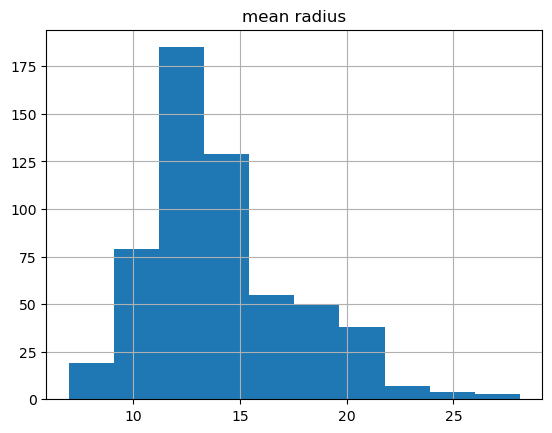

Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1: 0.9722222222222222
ROC AUC: 0.9580740255486406


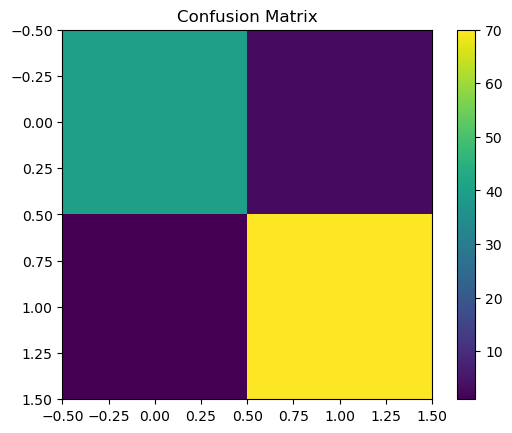

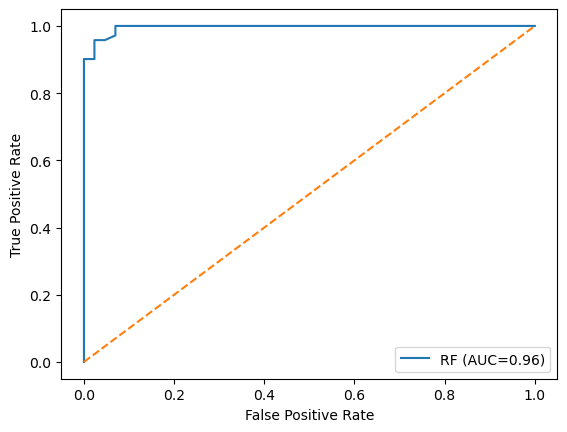

1 0.955


In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as  pd

data = load_breast_cancer(as_frame=True)  #as_frame for loading dataset is dataframe

df = data.frame  #feature + target
X= data.data     #feature
y= data.target  #target

print(df.shape)
df.head()

df.info()

df.isna().sum()   #missing values should be none for this dataset
df.describe().T    #summary statistics

import matplotlib.pyplot as plt
import numpy as np

corr = df.corr().abs()
corr_with_target = corr['target'].drop('target').sort_values(ascending=False)
print(corr_with_target.head())

X['mean radius'].hist()
plt.title('mean radius')
plt.show()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200 , random_state=42 , n_jobs = -1)
rf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score,precision_score , recall_score , f1_score , roc_auc_score
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]


accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("ROC AUC:", roc_auc)


from sklearn.metrics import confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix as image:
plt.imshow(cm, interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'RF (AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.legend()
plt.show()


import joblib
joblib.dump(rf, 'breast_cancer_rf.pkl')
joblib.dump(log_reg, 'breast_cancer_logreg.pkl')
joblib.dump(scaler, 'scaler.pkl')



import joblib, numpy as np
rf = joblib.load('breast_cancer_rf.pkl')
x = X_test[0:2, :]      # example real sample
pred = rf.predict(x)[0]
proba = rf.predict_proba(x)[0,1]
print(pred, proba)